In [1]:
from QuICT.core import Circuit
from QuICT.core.gate import *
from QuICT.core.operator import *

from QuICT.simulation.state_vector import ConstantStateVectorSimulator

In [2]:
# Build Based Circuit
qubits = 5
cir = Circuit(qubits)
cir.random_append(20)

# Build test CompositeGate
cgate0 = CompositeGate()
X | cgate0(0)
X | cgate0(1)
cgate1 = CompositeGate()
Y | cgate1(0)
Y | cgate1(1)

# Build Simulator
sim = ConstantStateVectorSimulator()

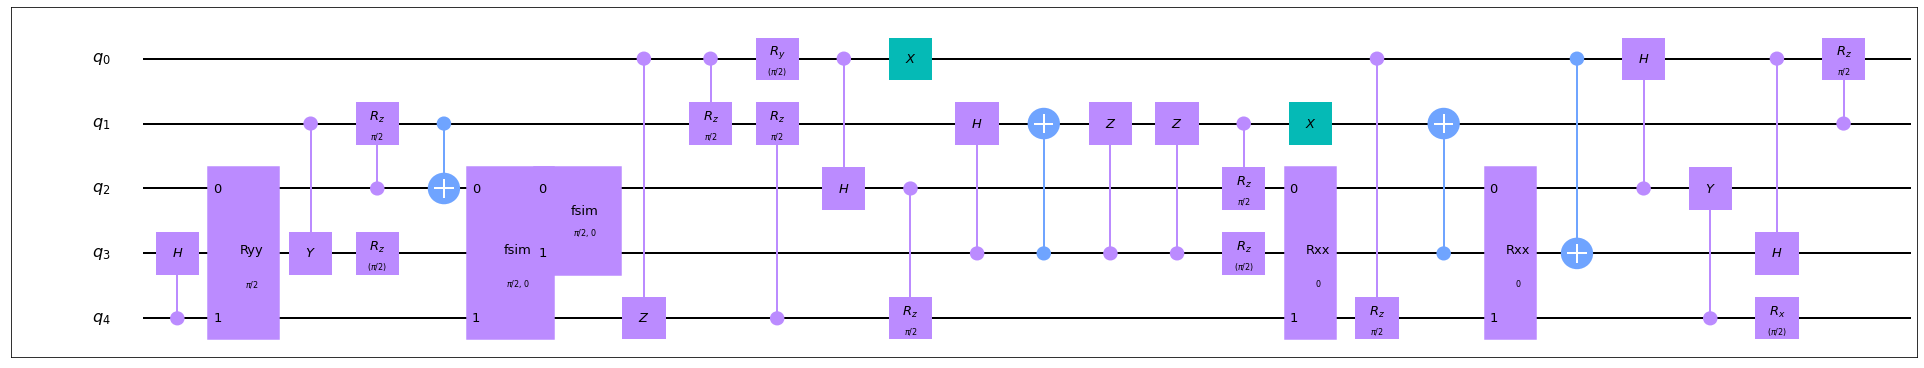

In [3]:
# Initial CheckPoint and CheckPointChild
cp = CheckPoint()
cp_child = cp.get_child()

# add CheckPoint into Circuit
cp | cir
cir.random_append(10)
# add CompositeGate with cp_child into cir
cp_child | cgate0
cgate0 | cir

# show the circuit's qasm
cir.draw()

In [4]:
# Add Trigger
state_mapping = {
    0: cgate0,
    1: cgate1
}

trigger = Trigger(
    targets=1,
    state_gate_mapping=state_mapping,
    record_measured=True
)

trigger | cir(0)

In [6]:
state = sim.run(cir)
print(state)
print(cir.qubits[0].measured)

[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -3.26096418e-17+1.79602524e-17j -2.50000000e-01-2.50000000e-01j
 -2.62688254e-17+2.65216738e-18j -2.50000000e-01-2.50000000e-01j
 -2.50000000e-01+2.50000000e-01j  1.15104767e-16+1.09607404e-17j
 -2.50000000e-01+2.50000000e-01j  9.97966820e-17+4.79177268e-17j
  2.03413043e-17+2.11129060e-17j  7.90939352e-18-3.53553391e-01j
  5.03321933e-18+1.47720895e-17j  7.90939352e-18-3.53553391e-01j
  3.53553391e-01+3.13429179e-17j -5.60471467e-17-3.42190921e-17j
  3.53553391e-01+2.200263

In [9]:
state = sim.run(cir)
print(state)
print(cir.qubits[0].measured)

[-4.26776695e-01-1.76776695e-01j  4.86989377e-17-5.03083881e-17j
 -4.26776695e-01-1.76776695e-01j  6.40070227e-17-5.66492045e-17j
 -2.51872252e-17-3.45677891e-17j -1.76776695e-01-7.32233047e-02j
 -6.21442116e-17-1.92597041e-17j -1.76776695e-01-7.32233047e-02j
  4.26776695e-01+1.76776695e-01j -7.38943082e-17+1.11302842e-17j
  4.26776695e-01+1.76776695e-01j -6.75534918e-17+2.64383692e-17j
  1.66252914e-17-3.83676190e-17j  1.76776695e-01+7.32233047e-02j
  1.31720638e-18-7.53246054e-17j  1.76776695e-01+7.32233047e-02j
  0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
  0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
  0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
  0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000

In [12]:
# Add NoiseGate
from QuICT.core.noise import BitflipError
noise = BitflipError(0.05)

ng = NoiseGate(
    gate = H,
    error = noise
)
ng | cir(0)

In [13]:
# Add DataSwitch and DeviceTrigger
# build CompositeGate with DataSwitch
cgate0 = CompositeGate()
DataSwitch(
    destination = 1,
    type = DataSwitchType.half
) | cgate0
cgate1 = CompositeGate()
DataSwitch(
    destination = 0,
    type = DataSwitchType.half
) | cgate1

device_gate_mapping = {
    0: cgate0,
    1: cgate1
}

device_trigger = DeviceTrigger(device_gate_mapping)
device_trigger | cir